In [119]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [120]:
df = pd.read_csv("http://bit.ly/data-diabetes-csv")
df.shape

(768, 9)

In [121]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


/usr/local/lib/python3.8/dist-packages/pandas/plotting/_matplotlib/tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


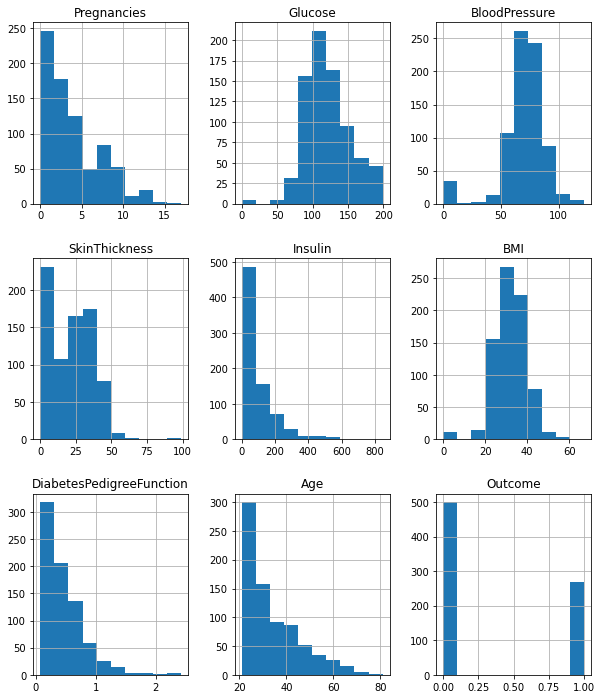

In [122]:
_ = df.hist(figsize=(10, 12))

In [123]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [124]:
df["Insulin_nan"] = df["Insulin"].replace(0, np.nan)

In [125]:
insulin_median = df.groupby("Outcome")["Insulin_nan"].median()
insulin_median

Outcome
0    102.5
1    169.5
Name: Insulin_nan, dtype: float64

In [126]:
df["Insulin_fill"] = df["Insulin_nan"]

In [127]:
df.loc[(df["Outcome"] == 0) & (df["Insulin_nan"].isnull()) , "Insulin_fill"] = insulin_median[0]
df.loc[(df["Outcome"] == 1) & (df["Insulin_nan"].isnull()) , "Insulin_fill"] = insulin_median[1]

In [128]:
df.groupby("Outcome")["Insulin_fill"].describe()

,count,mean,std,min,25%,50%,75%,max
Outcome,,,,,,,,
0,500.0,117.172000,75.685302,15.0,95.0,102.5,105.0,744.0
1,268.0,187.615672,94.114420,14.0,169.5,169.5,169.5,846.0


In [129]:
label_name = "Outcome"
label_name

'Outcome'

In [130]:
X = df.drop(columns=[label_name, "Insulin_nan", "Insulin"])
y = df[label_name]
X.shape, y.shape

((768, 8), (768,))

In [131]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Age,Insulin_fill
0,6,148,72,35,33.6,0.627,50,169.5
1,1,85,66,29,26.6,0.351,31,102.5
2,8,183,64,0,23.3,0.672,32,169.5
3,1,89,66,23,28.1,0.167,21,94.0
4,0,137,40,35,43.1,2.288,33,168.0


In [132]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=0.2, random_state=42)

In [134]:
import tensorflow as tf

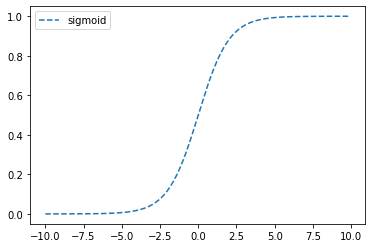

In [135]:
x = np.arange(-10, 10, 0.1)
plt.plot(x, tf.keras.activations.sigmoid(x), linestyle='--', label="sigmoid") 
plt.legend()

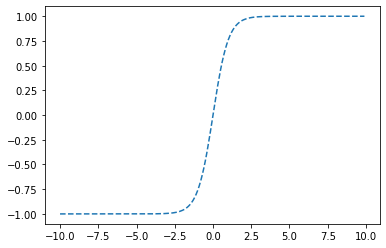

In [136]:
plt.plot(x, tf.keras.activations.tanh(x), linestyle='--', label="tanh") 

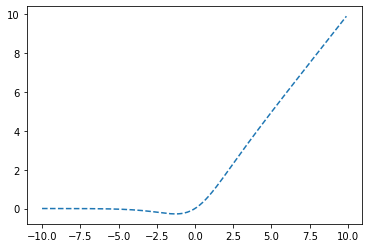

In [137]:
plt.plot(x, tf.keras.activations.swish(x), linestyle='--', label="swish") 

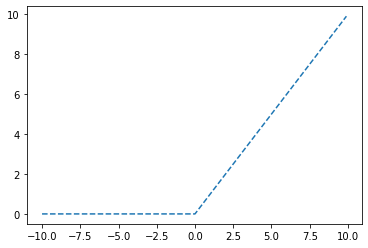

In [138]:
plt.plot(x, tf.keras.activations.relu(x), linestyle='--', label="relu") 

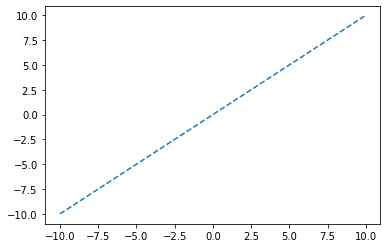

In [139]:

plt.plot(x, x, linestyle='--', label="x") 

In [140]:
print(dir(tf.keras.activations))

['__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', '_sys', 'deserialize', 'elu', 'exponential', 'gelu', 'get', 'hard_sigmoid', 'linear', 'relu', 'selu', 'serialize', 'sigmoid', 'softmax', 'softplus', 'softsign', 'swish', 'tanh']


In [141]:
input_shape = len(X_train.keys())
input_shape

8

In [142]:
input_shape = X_train.shape[1]
input_shape

8

In [143]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(units=256, activation='relu', input_shape=[input_shape]),
    tf.keras.layers.Dense(units=128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(units=64, activation='swish'),
    tf.keras.layers.Dense(units=32, activation='swish'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(units=32, activation='swish'),
    tf.keras.layers.Dense(units=16, activation='swish'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(units=1, activation='sigmoid'),         
])
model

In [144]:
model.compile(optimizer="adam", 
              loss="binary_crossentropy",
              metrics=["accuracy"])

In [145]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_21 (Dense)            (None, 256)               2304      
                                                                 
 dense_22 (Dense)            (None, 128)               32896     
                                                                 
 dropout_9 (Dropout)         (None, 128)               0         
                                                                 
 dense_23 (Dense)            (None, 64)                8256      
                                                                 
 dense_24 (Dense)            (None, 32)                2080      
                                                                 
 dropout_10 (Dropout)        (None, 32)                0         
                                                                 
 dense_25 (Dense)            (None, 32)               

In [146]:
class PrintDot(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0: print('')
    print('.', end='')

early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=100)

In [147]:
history = model.fit(X_train, y_train, epochs=1000, validation_split=0.2, 
                    callbacks=[early_stop, PrintDot()], verbose=0)
history


....................................................................................................
....................................................................................................
...........................

In [148]:
df_hist = pd.DataFrame(history.history)
df_hist.tail()

,loss,accuracy,val_loss,val_accuracy
222,0.186128,0.906314,0.432861,0.878049
223,0.214581,0.900204,0.526613,0.845528
224,0.226514,0.906314,0.478555,0.813008
225,0.207074,0.906314,0.623953,0.796748
226,0.213870,0.900204,0.473977,0.878049


/usr/local/lib/python3.8/dist-packages/pandas/plotting/_matplotlib/tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
/usr/local/lib/python3.8/dist-packages/pandas/plotting/_matplotlib/tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


<AxesSubplot:>

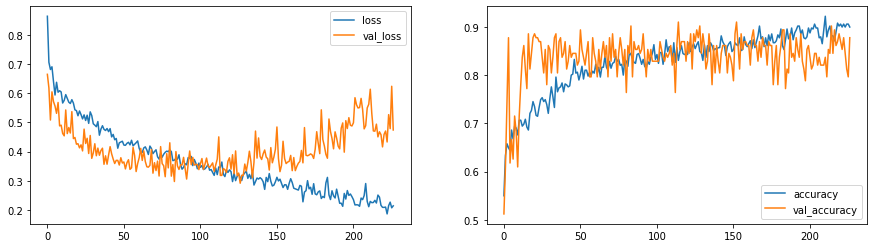

In [149]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))
df_hist[["loss", "val_loss"]].plot(ax=axes[0])
df_hist[["accuracy", "val_accuracy"]].plot(ax=axes[1])

In [150]:
y_pred = model.predict(X_test).flatten()
y_pred.shape

(154,)

In [151]:
y_pred.round(2)

array([0.56, 0.  , 0.  , 0.  , 0.  , 0.99, 0.01, 0.  , 0.58, 0.  , 0.99,
       0.02, 0.15, 0.  , 0.  , 0.19, 0.  , 0.  , 0.18, 0.05, 0.  , 0.  ,
       0.39, 0.01, 0.45, 0.77, 0.21, 0.  , 0.01, 0.  , 0.01, 1.  , 0.17,
       0.28, 0.  , 0.63, 0.51, 0.73, 0.  , 1.  , 0.  , 0.  , 0.  , 1.  ,
       0.  , 0.08, 0.51, 0.01, 0.  , 0.37, 0.  , 0.74, 0.94, 1.  , 0.04,
       0.  , 0.  , 0.02, 0.02, 1.  , 0.53, 0.02, 1.  , 1.  , 0.  , 0.  ,
       0.01, 0.02, 0.  , 0.47, 0.59, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.16, 0.07, 0.  , 1.  , 0.  , 0.  , 0.01, 0.03, 0.64, 0.58, 0.07,
       0.01, 0.  , 0.01, 0.  , 0.03, 0.99, 0.24, 0.06, 0.  , 0.  , 0.15,
       0.  , 0.  , 0.  , 1.  , 0.51, 1.  , 0.22, 0.41, 0.56, 0.  , 0.99,
       0.01, 0.  , 0.  , 0.97, 0.4 , 0.01, 0.98, 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.91, 0.  , 0.  , 0.44, 0.99, 0.67, 0.93, 0.35, 1.  , 0.72,
       0.13, 0.66, 0.14, 0.  , 1.  , 0.  , 0.34, 0.  , 0.01, 0.  , 0.  ,
       0.28, 0.  , 0.  , 1.  , 0.02, 0.01, 1.  , 0.

In [152]:
y_predict = (y_pred > 0.5).astype(int)
y_predict

array([1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0])

In [153]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print('\n테스트 정확도:', test_acc)

5/5 [==============================] - 0s 2ms/step - loss: 0.8964 - accuracy: 0.8312

테스트 정확도: 0.8311688303947449


In [155]:
(y_test == y_predict).mean()

0.8311688311688312